In [ ]:
# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
fashion_data = keras.datasets.fashion_mnist # load data
(train_data, y_train), (test_data, y_test) = fashion_data.load_data() # split into training and testing

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
test_data.shape, y_test.shape

((10000, 28, 28), (10000,))

### Tenemos 60000 muestras para aprendizaje y 10000 para test

In [ ]:
# Mostramos el contenido del conjunto de datos de entrenamiento
print(train_data[0,20,27])
print(train_data[0,23,23])

67
194


#### Como bien sabemos, incluyen pixeles con valores desde 0 hasta 255, por lo que deberemos normalizar los datos simplemente dividiendo por 255.

In [ ]:
# Creamos un array con los valores de las labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Mostramos un muestra del conjunto de entrenamiento

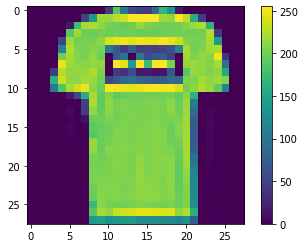

In [ ]:
plt.figure() # Make a figure
plt.imshow(train_data[1]) # Show the image
plt.colorbar() # do color bar
plt.grid(False)
plt.show()

## Preprocesing Data

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

## Creating The Model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
model.add(keras.layers.MaxPool2D( (2,2) ))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu' ))
model.add(keras.layers.MaxPool2D( (2,2) ))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu' ))
model.add(keras.layers.MaxPool2D( (2,2) ))

**Capa 1**

El tamaño de entrada de nuestros datos será 28, 28, 1 y procesaremos 32 filtros de tamaño 3x3 sobre nuestros datos de entrada. También aplicaremos la función de activación relu a la salida de cada operación de convulción.

**Capa 2**

Esta capa realizará la operación de Pooling Máximo utilizando muestras de 2x2 y un stride de 2.

**Resto de capas**

El siguiente conjunto de capas hace cosas muy similares, pero toma como entrada el mapa de características de la capa anterior. También aumentan la frecuencia de los filtros de 32 a 128. Podemos hacer esto porque nuestros datos se reducen en dimensiones espaciales al pasar por las capas, lo que significa que podemos permitirnos (computacionalmente) añadir más profundidad.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

## Adding Dense Layers

Hasta ahora, sólo hemos completado la base convolucional. Ahora necesitamos tomar estas características extraídas y añadir una forma de clasificarlas. Por eso añadimos las siguientes capas a nuestro modelo.

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Training the Model

In [ ]:
history = model.fit(train_data, y_train, epochs=20, validation_data=(test_data, y_test))

Epoch 1/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.5801 - accuracy: 0.7880 - val_loss: 0.4594 - val_accuracy: 0.8295
Epoch 2/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3912 - accuracy: 0.8572 - val_loss: 0.3826 - val_accuracy: 0.8631
Epoch 3/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3364 - accuracy: 0.8758 - val_loss: 0.3464 - val_accuracy: 0.8745
Epoch 4/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2998 - accuracy: 0.8894 - val_loss: 0.3299 - val_accuracy: 0.8805
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2688 - accuracy: 0.9000 - val_loss: 0.3122 - val_accuracy: 0.8880
Epoch 6/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2459 - accuracy: 0.9076 - val_loss: 0.3185 - val_accuracy: 0.8899
Epoch 7/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2266 - accuracy: 0.9157 - val_loss: 0.3182 -

## Evaluating the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_data,y_test, verbose=1)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.4879 - accuracy: 0.8940
Test accuracy: 0.8939999938011169


## Print Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


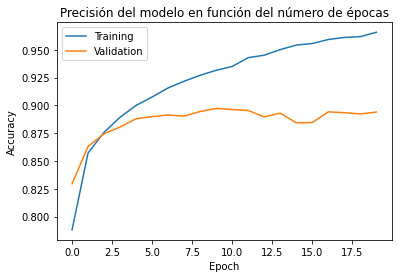

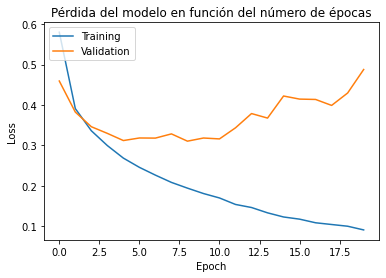

In [ ]:
# Graficar la precisión del entrenamiento y la validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo en función del número de épocas')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

# Graficar la pérdida del entrenamiento y la validación
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo en función del número de épocas')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

## Predicting Data

In [ ]:
predictions = model.predict(test_data)


313/313 [==============================] - 2s 7ms/step


Introduzca un número entero:100


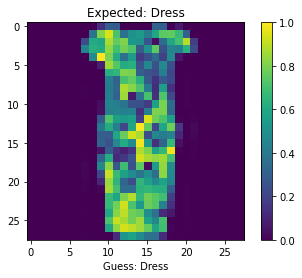

In [ ]:
def get_number():
    number = input("Introduzca un número entero:" )
    if not number.isdigit():
        return "Inserte un número válido"
    return number

def verify_predict(number):
    # Label esperada
    label = 'Expected: ' + str(class_names[y_test[int(number)]])
    # Label predicha
    xlabel = 'Guess: ' + str(class_names[np.argmax(predictions[int(number)])])

    # Dibujamos el articulo original
    plt.figure()
    plt.title(label)
    plt.imshow(test_data[int(number)])
    plt.xlabel(xlabel)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
# Pedimos los datos al usuario
num = get_number()
verify_predict(num) 